In [11]:
#라이브러리
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100, 100, 3), activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          2

In [9]:
# 특성 맵 정의
ins = model.inputs
outs = model.layers[0].output
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


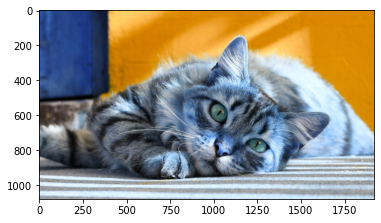

In [12]:
# 이미지 호출
img = cv2.imread("../ch05/data/cat.jpg")
plt.imshow(img)

(1, 100, 100, 3)
(1, 96, 96, 32)


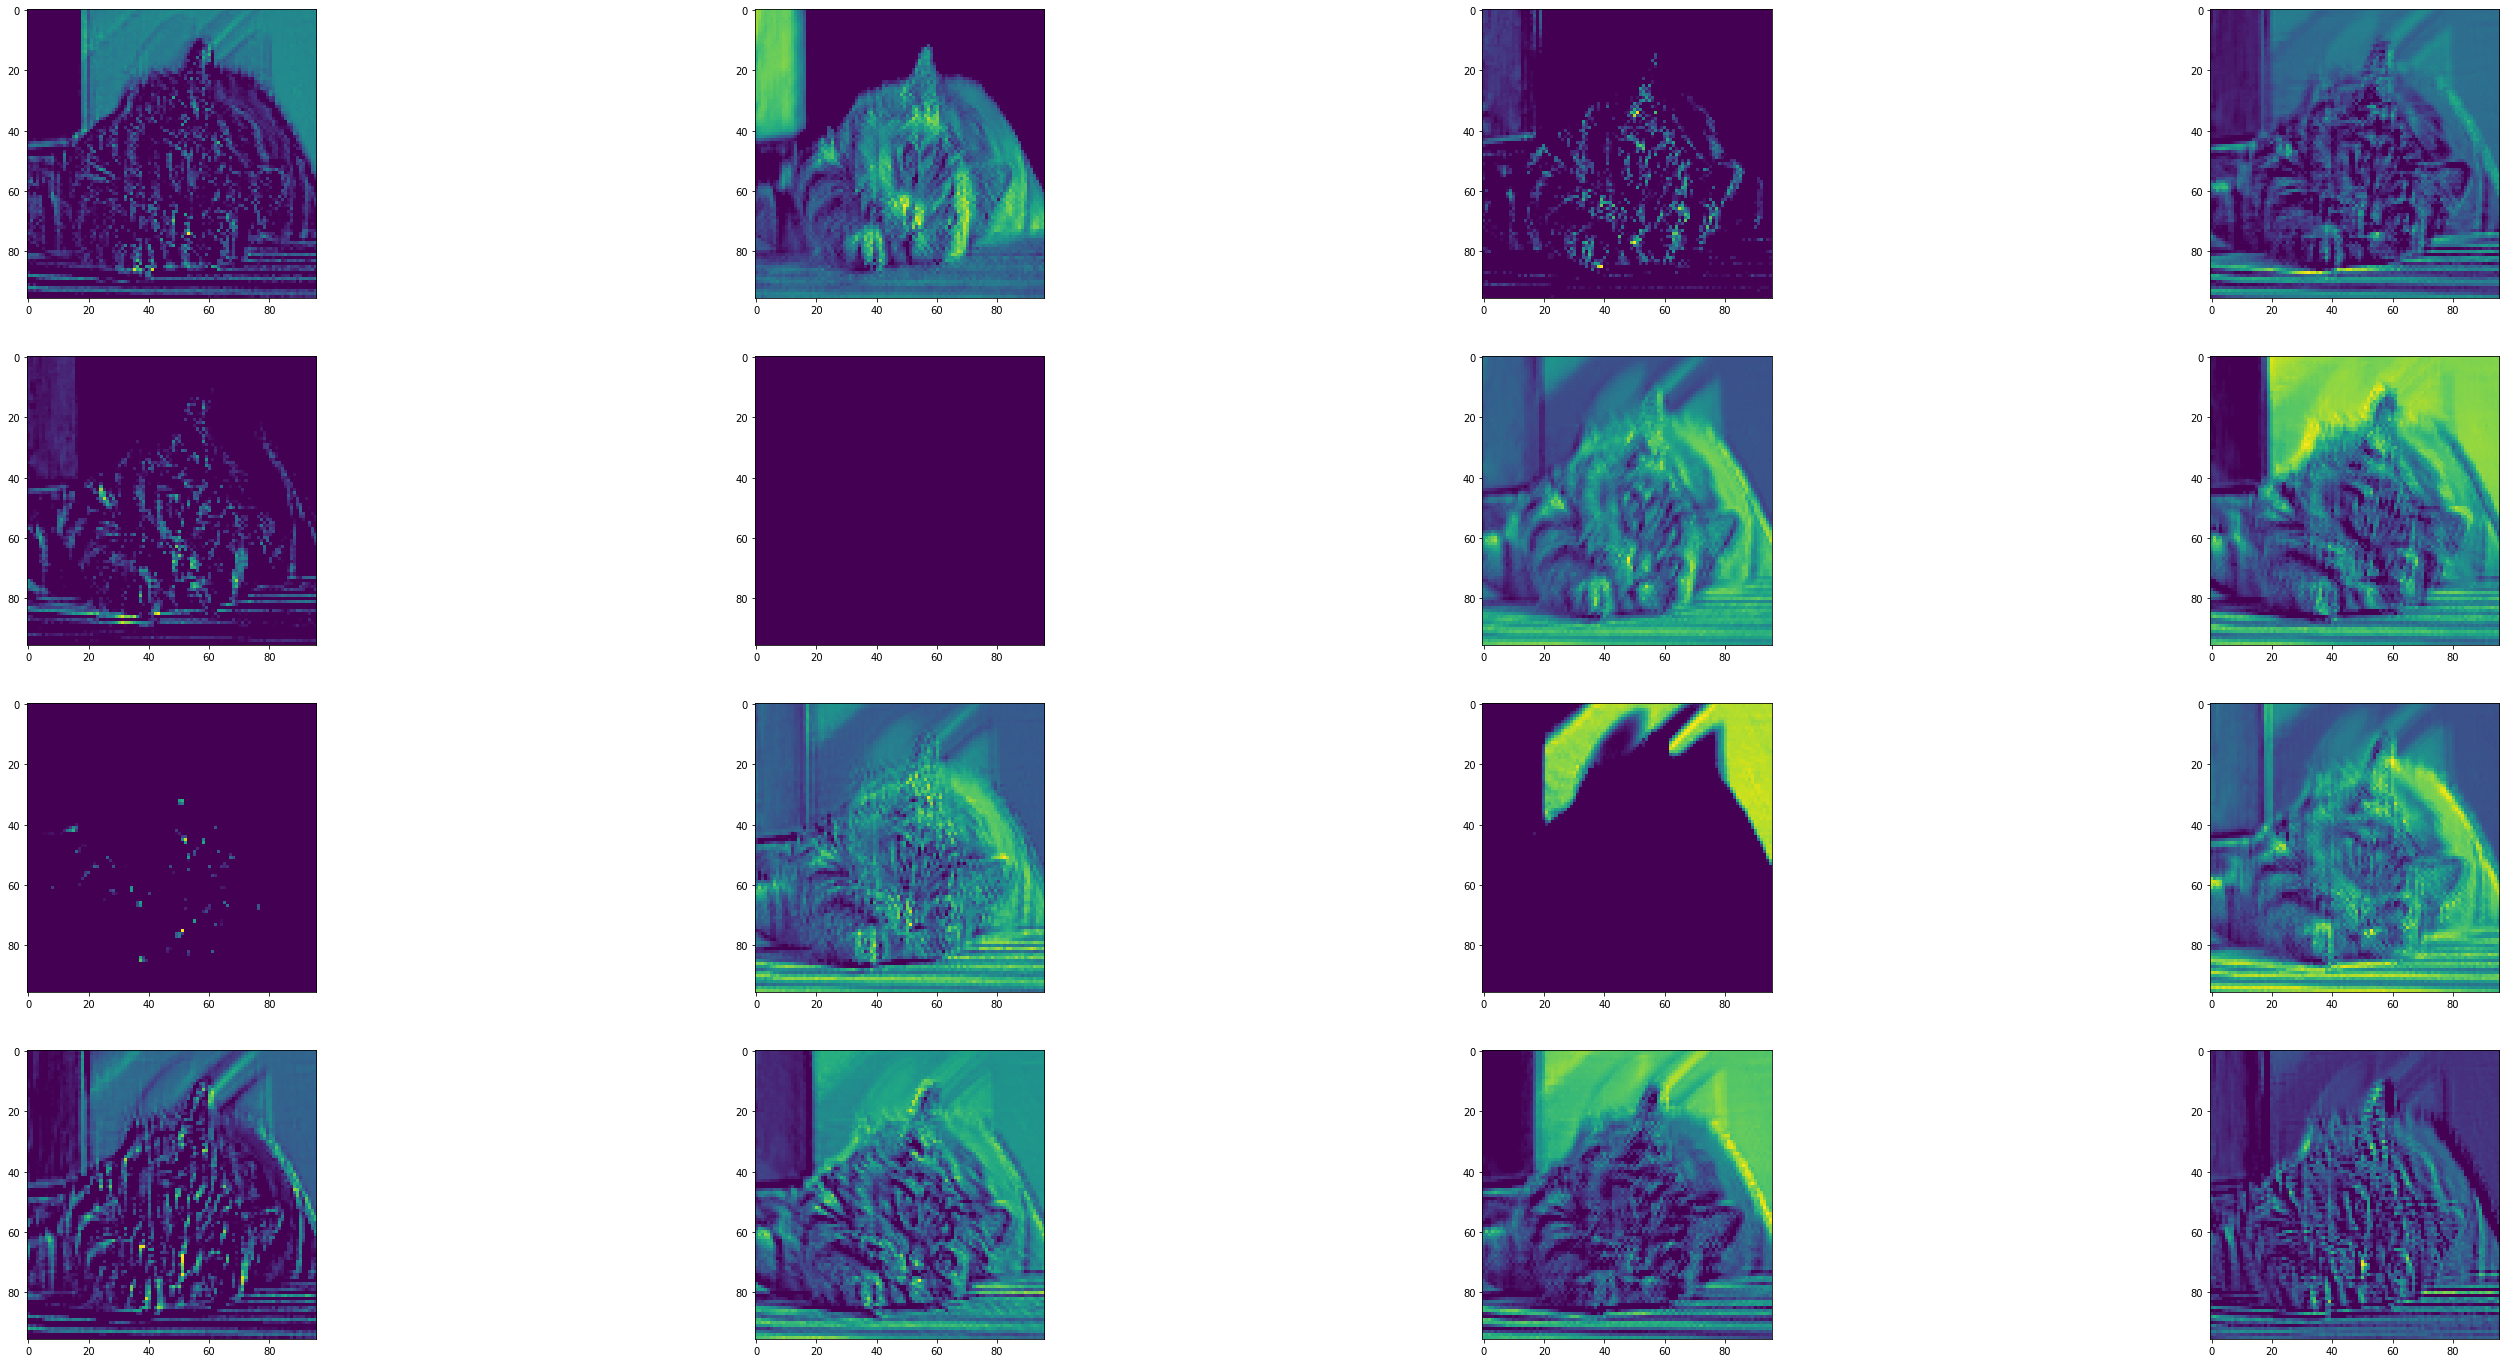

In [13]:
#이미지 전처리 및 특성 맵 확인
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)
fig = plt.figure(figsize=(50,50))
for i in range(16):
    ax = fig.add_subplot(8, 4, i+1)
    ax.imshow(feature[0, : , : , i])

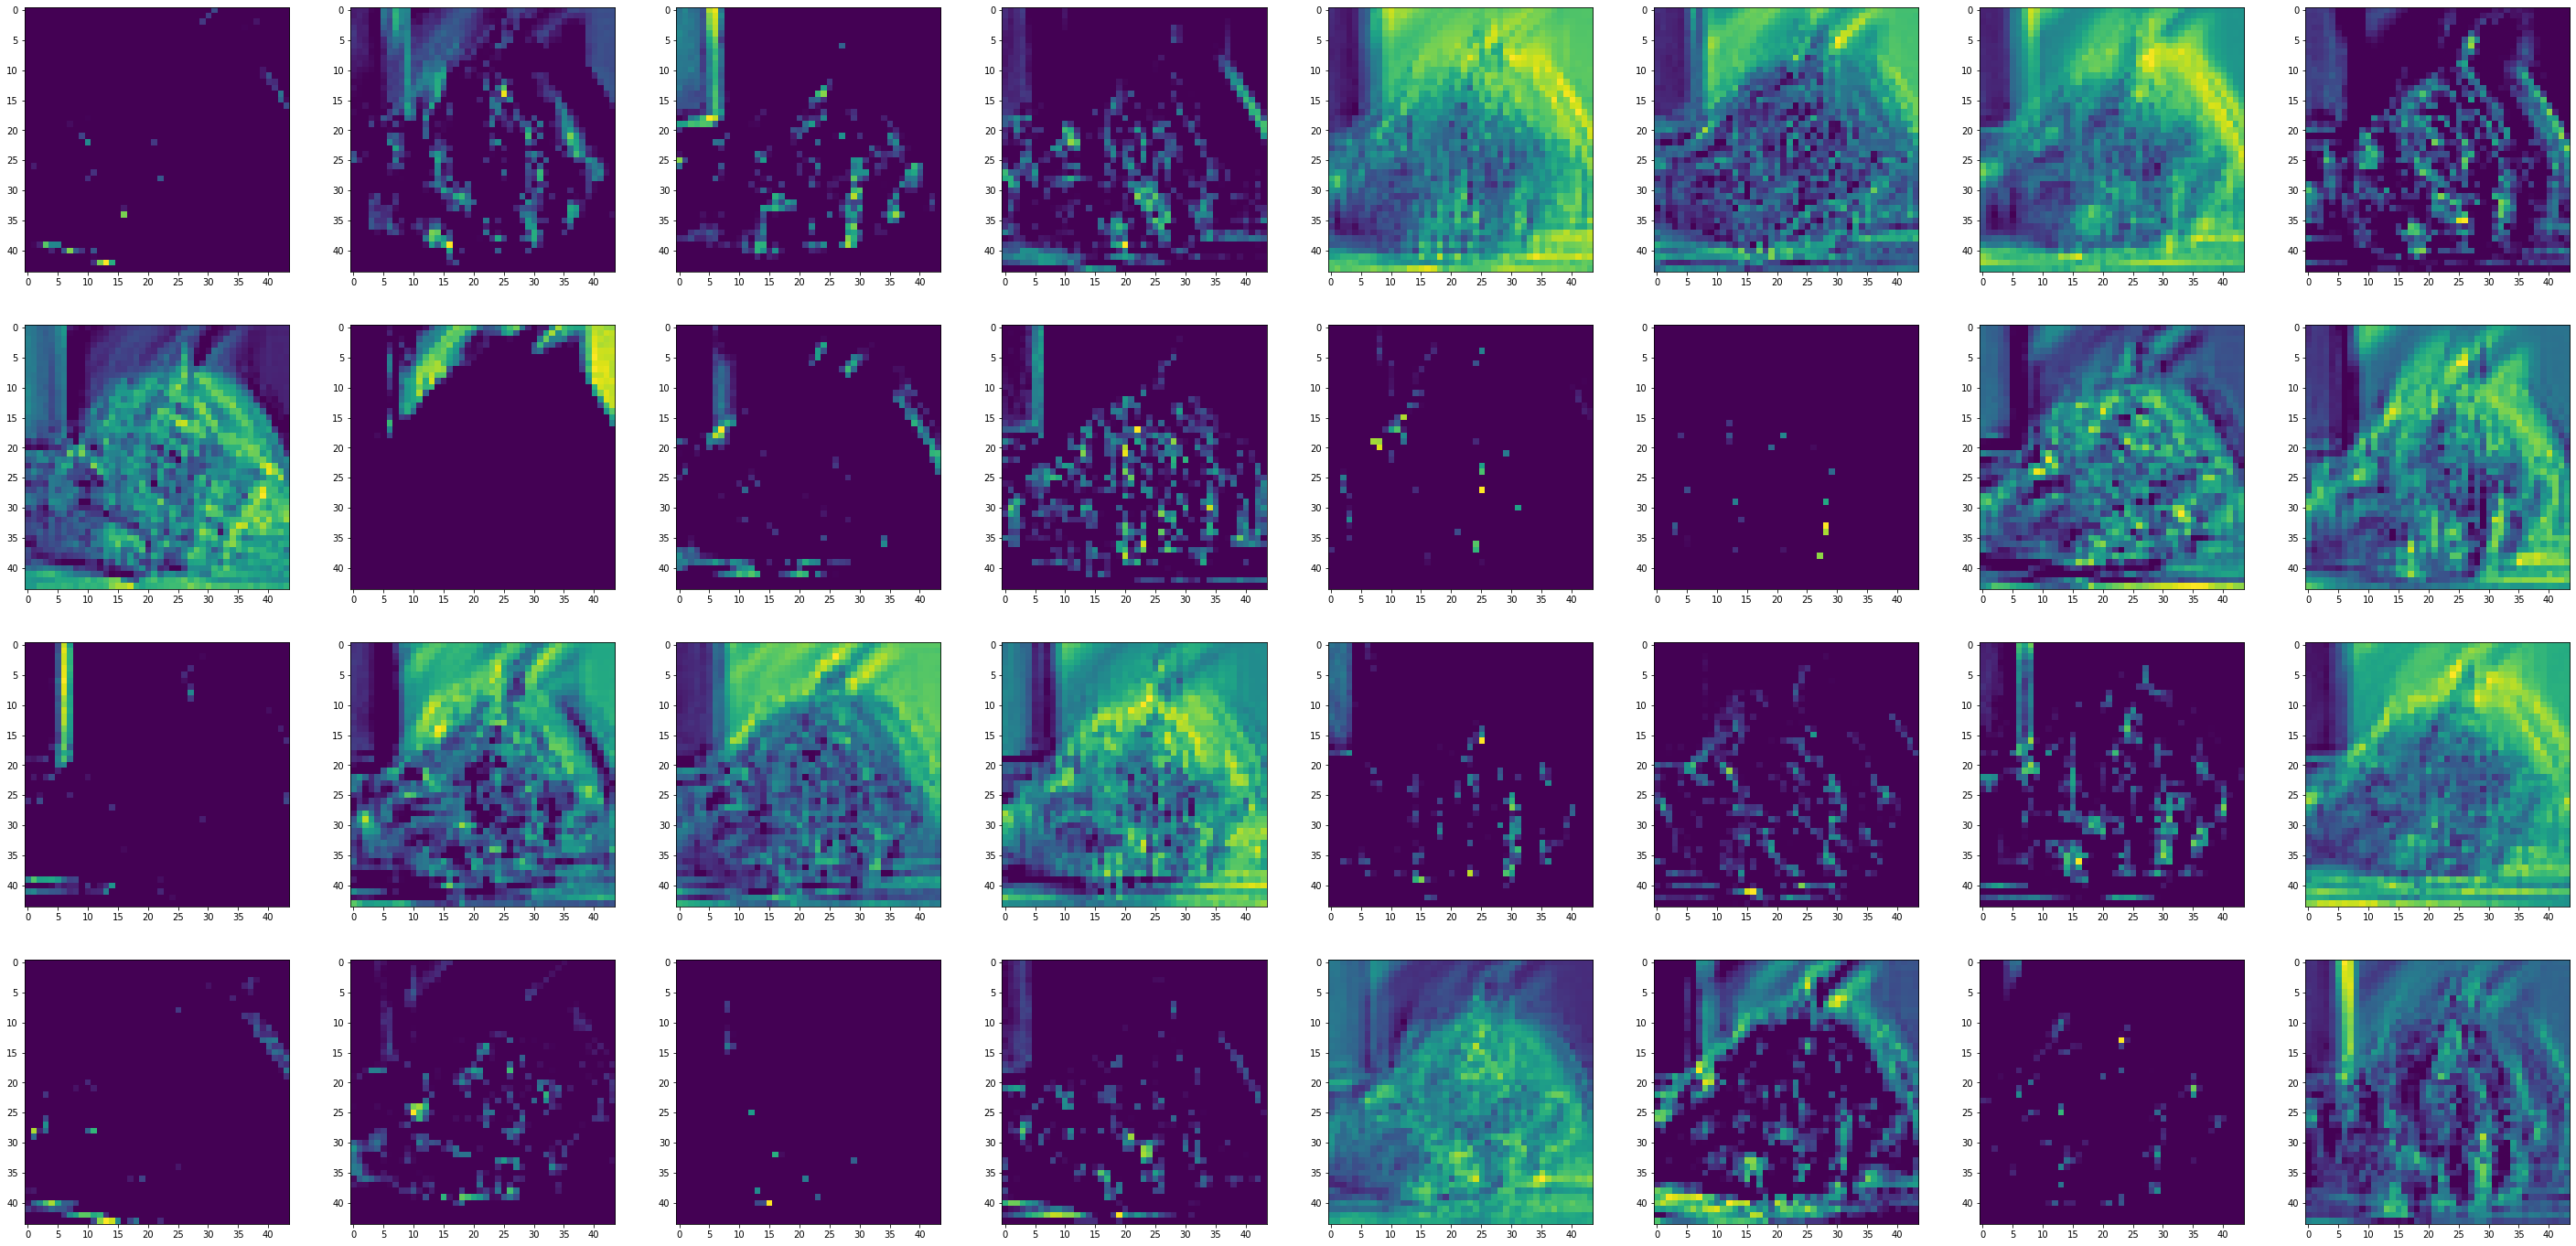

In [15]:
# 이미지를 모델에 적용 #1
ins = model.inputs
outs = model.layers[2].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread("../ch05/data/cat.jpg")
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50,50))
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0, : , : , i])

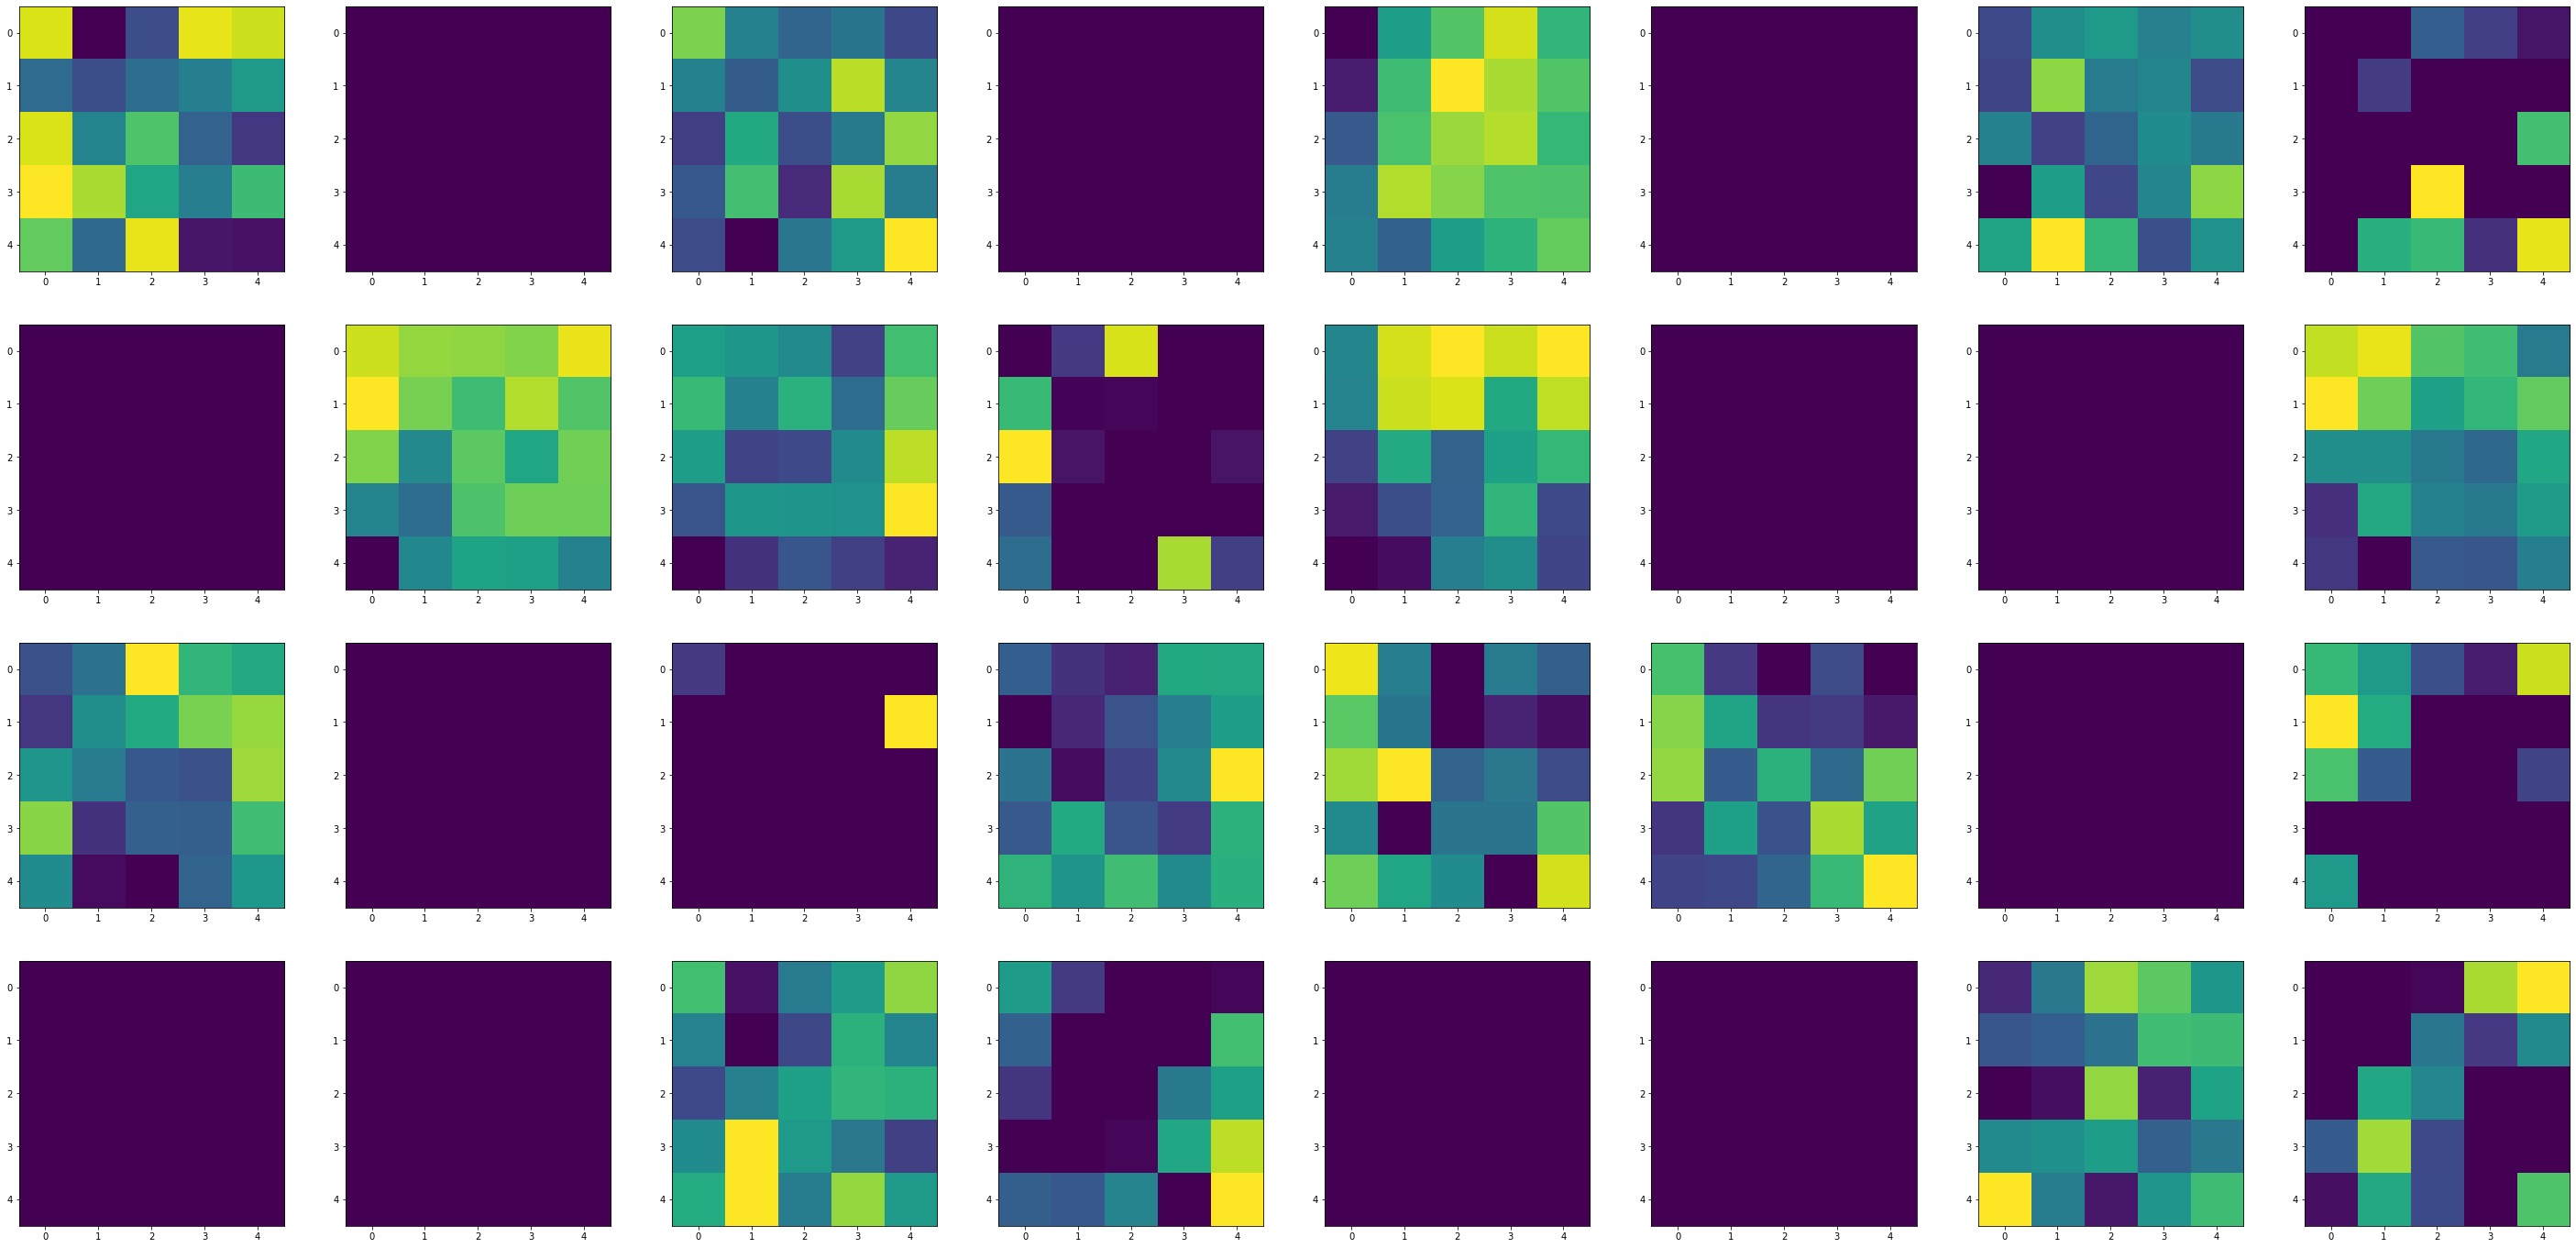

In [16]:
# 이미지를 모델에 적용 #2
ins = model.inputs
outs = model.layers[6].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread("../ch05/data/cat.jpg")
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50,50))
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0, : , : , i])